## Gemini GMOS Photometry reduction using DRAGONS Python API
#### from https://gmosimg-drtutorial.readthedocs.io/en/v2.1.1/03_api_reduction.html
#### don't forget to run `conda install nb_conda_kernels ipykernel` to run this notebook on the DRAGONS env

**Importing Python Libraries**

In [1]:
from __future__ import print_function

import glob
import wget

from gempy.adlibrary import dataselect
from recipe_system import cal_service
from recipe_system.reduction.coreReduce import Reduce
from gempy.utils import logutils

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib.colors import LogNorm

%matplotlib inline

**Downloading the data**

In [2]:
wget.download("http://archive.gemini.edu/file/N20170613S0180.fits")
wget.download("http://archive.gemini.edu/file/N20170613S0181.fits")
wget.download("http://archive.gemini.edu/file/N20170613S0182.fits")
wget.download("http://archive.gemini.edu/file/N20170613S0183.fits")
wget.download("http://archive.gemini.edu/file/N20170613S0184.fits")
wget.download("http://archive.gemini.edu/file/N20170614S0201.fits")
wget.download("http://archive.gemini.edu/file/N20170614S0202.fits")
wget.download("http://archive.gemini.edu/file/N20170614S0203.fits")
wget.download("http://archive.gemini.edu/file/N20170614S0204.fits")
wget.download("http://archive.gemini.edu/file/N20170614S0205.fits")
wget.download("http://archive.gemini.edu/file/N20170615S0534.fits")
wget.download("http://archive.gemini.edu/file/N20170615S0535.fits")
wget.download("http://archive.gemini.edu/file/N20170615S0536.fits")
wget.download("http://archive.gemini.edu/file/N20170615S0537.fits")
wget.download("http://archive.gemini.edu/file/N20170615S0538.fits")
wget.download("http://archive.gemini.edu/file/N20170702S0178.fits")
wget.download("http://archive.gemini.edu/file/N20170702S0179.fits")
wget.download("http://archive.gemini.edu/file/N20170702S0180.fits")
wget.download("http://archive.gemini.edu/file/N20170702S0181.fits")
wget.download("http://archive.gemini.edu/file/N20170702S0182.fits")

'N20170702S0182.fits'

**Create and move data to raw/ directory**

In [3]:
!mkdir raw/
!mv N*.fits raw/

**Setting up the DRAGONS logger**

In [4]:
logutils.config(file_name='gmos_data_reduction.log')

**Setting up the Calibration Service**

First, check that you have already a `rsys.cfg` file inside the `~/.geminidr/`. It should contain:

```[calibs]
standalone = True
database_dir = /path_to_my_data/gmosimg_tutorial_api/playground```

In [5]:
caldb = cal_service.CalibrationService()
caldb.config()
caldb.init()

cal_service.set_calservice()

CalibrationService is configured as standalone.
The configured local database will be used.


**Create a list of all the FITS files in the directory**

In [6]:
all_files = glob.glob('raw/*.fits')
all_files.sort()

**List of Biases**

In [7]:
list_of_biases = dataselect.select_data(
    all_files,
    ['BIAS'],
    []
)

**List of Flats**

In [8]:
list_of_flats = dataselect.select_data(
     all_files,
     ['FLAT'],
     [],
     dataselect.expr_parser('filter_name=="i"')
)

**List of Science Data**

In [9]:
list_of_science = dataselect.select_data(
    all_files,
    [],
    ['CAL'],
    dataselect.expr_parser('(observation_class=="science" and filter_name=="i")')
)

**Make Master Bias**

In [10]:
reduce_bias = Reduce()
reduce_bias.files.extend(list_of_biases)
reduce_bias.runr()

caldb.add_cal(reduce_bias.output_filenames[0])

All submitted files appear valid:
raw/N20170613S0180.fits ... raw/N20170615S0538.fits, 10 files submitted.
RECIPE: _default
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Upd

**Make Master Flat**

In [11]:
reduce_flats = Reduce()
reduce_flats.files.extend(list_of_flats)
reduce_flats.runr()

caldb.add_cal(reduce_flats.output_filenames[0])

All submitted files appear valid:
raw/N20170702S0178.fits ... raw/N20170702S0182.fits, 5 files submitted.
RECIPE: _default
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         .
         PRIMITIVE: standardizeInstrumentHeaders
         ---------------------------------------
         Updating keywords that are specific to GMOS
         Fixing headers for GMOS-N Ha

         Processing OBJCAT
         Array maps to [1:1024,1:2112]
         Processing OBJCAT
         Array maps to [1:1024,1:2112]
         Processing OBJCAT
         .
         PRIMITIVE: tileArrays
         ---------------------
         Array maps to [1:1024,1:2112]
         Processing OBJCAT
         Array maps to [1:1024,1:2112]
         Processing OBJCAT
         Array maps to [1:1024,1:2112]
         Processing OBJCAT
         .
         PRIMITIVE: tileArrays
         ---------------------
         Array maps to [1:1024,1:2112]
         Processing OBJCAT
         Array maps to [1:1024,1:2112]
         Processing OBJCAT
         Array maps to [1:1024,1:2112]
         Processing OBJCAT
         .
      .
      PRIMITIVE: stackFrames
      ----------------------
      Combining EXTVER 1.
      
      Combining EXTVER 2.
      
      Combining EXTVER 3.
      
      Combining EXTVER 4.
      
      Combining EXTVER 5.
      
      Combining EXTVER 6.
      
      Combining EXTVER 7

**Reduce Science Images**

In [12]:
reduce_science = Reduce()
reduce_science.files.extend(list_of_science)
reduce_science.runr()

All submitted files appear valid:
raw/N20170614S0201.fits ... raw/N20170614S0205.fits, 5 files submitted.
RECIPE: _default
   PRIMITIVE: prepare
   ------------------
      PRIMITIVE: validateData
      -----------------------
      .
      PRIMITIVE: standardizeStructure
      -------------------------------
      .
      PRIMITIVE: standardizeHeaders
      -----------------------------
         PRIMITIVE: standardizeObservatoryHeaders
         ----------------------------------------
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         Updating keywords that are common to all Gemini data
         .
         PRIMITIVE: standardizeInstrumentHeaders
         ---------------------------------------
         Updating keywords that are specific to GMOS
         Fixing headers for GMOS-N Ha

   Array maps to [1:1024,1:2111]
   Array maps to [1059:2082,1:2112]
   Array maps to [2117:3139,2:2112]
   Array maps to [1:1024,1:2111]
   Array maps to [1059:2082,1:2112]
   Array maps to [2117:3139,2:2112]
   Array maps to [1:1024,1:2111]
   Array maps to [1059:2082,1:2112]
   Array maps to [2117:3139,2:2112]
   .
   PRIMITIVE: detectSources
   ------------------------
   Found 1522 sources in N20170614S0201_mosaic.fits:1
   Found 1543 sources in N20170614S0202_mosaic.fits:1
   Found 1564 sources in N20170614S0203_mosaic.fits:1
   Found 1588 sources in N20170614S0204_mosaic.fits:1
   Found 1607 sources in N20170614S0205_mosaic.fits:1
   .
   PRIMITIVE: adjustWCSToReference
   -------------------------------
   Reference image: N20170614S0201_sourcesDetected.fits
   Cross-correlating sources in N20170614S0201_sourcesDetected.fits, N20170614S0202_sourcesDetected.fits
   Coarse model in 0.35 seconds
   x_offset: -0.9789343246592352
   y_offset: -0.9789343246592352
   
   Final model i

**Display the Stacked Image**

In [13]:
image_file = "N20170614S0201_stack.fits"
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: N20170614S0201_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     216   ()      
  1  SCI           1 ImageHDU       162   (3245, 2264)   float32   
  2  VAR           1 ImageHDU       162   (3245, 2264)   float32   
  3  DQ            1 ImageHDU       162   (3245, 2264)   int16 (rescales to uint16)   


In [14]:
image_data = fits.getdata(image_file, ext=1)
print(image_data.shape)

(2264, 3245)


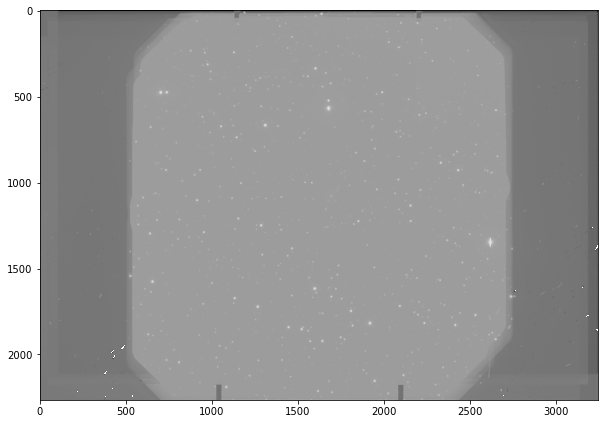

In [15]:
plt.figure(figsize = (10,10))
plt.imshow(image_data,cmap='gray',norm=LogNorm(vmin=0.01, vmax=1000000))
plt.show()

**Optional: remove duplicate calibrations and remove raw data (uncomment lines before running)**

In [16]:
#!rm -rf *_bias.fits *_flat.fits
#!rm -rf raw/